# Competição do Dataset Adidas vs Nike (kaggle)

# Objetivo

# Introdução

# Desenvolvimento 

# Análise dos dados

In [9]:
import pandas as pd
import re
import seaborn as sns
import seaborn.objects as so
import matplotlib as plt
import numpy as np

In [12]:
dados = pd.read_csv('C:/Users/mauri/Desktop/Cursos Diversos/kaggle/AdidasNike/Data/AdidasVsNike.csv' , sep=',')

In [13]:
dados.head(3)

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15


----
Dimensão da base
- Base de possui 10 colunas e 3268 linhas.
----

In [5]:
print(dados.shape)

(3268, 10)


----
## Dicionário de dados 
- **Product Name**: Nome dos produtos
- **Product ID**: Código dos produtos 
- **Listing Price**: Preço tabelado dos produtos
- **Sale Price**: Preço de venda dos produtos
- **Discount**: Desconto aplicado ao produto
- **Brand**: Marca do produto
- **Description**: Descrição dos produtos vendidos
- **Rating**: Nota de avaliação do produto
- **Reviews**: Quantidade de visualização do produto
- **Last Visited**: Última data de visita
----


-------
Análise de dados faltantes
- Foram identificados apenas 3 informações nulas. Sendo a descrição de três produtos.
------

In [14]:
dados.isnull().sum()

Product Name     0
Product ID       0
Listing Price    0
Sale Price       0
Discount         0
Brand            0
Description      3
Rating           0
Reviews          0
Last Visited     0
dtype: int64

In [27]:
dados[dados['Description'].isnull()]


,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
2780,Nike React Infinity Run Flyknit,CD4371-001,0,13995,0,Nike,NaN,4.6,68,2020-04-13T15:30:15
2888,Nike React Infinity Run Flyknit,CD4372-004,0,13995,0,Nike,NaN,4.2,29,2020-04-13T15:32:18
3133,Nike Free X Metcon 2,CD8526-446,0,9995,0,Nike,NaN,3.0,7,2020-04-13T15:36:37


In [28]:
dados[dados['Product Name']=='Nike React Infinity Run Flyknit']

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
2780,Nike React Infinity Run Flyknit,CD4371-001,0,13995,0,Nike,NaN,4.6,68,2020-04-13T15:30:15
2888,Nike React Infinity Run Flyknit,CD4372-004,0,13995,0,Nike,NaN,4.2,29,2020-04-13T15:32:18


In [29]:
dados[dados['Product Name']=='Nike Free X Metcon 2']

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
2822,Nike Free X Metcon 2,AQ8306-407,9995,7997,0,Nike,The Nike Free X Metcon will take you from a sh...,3.4,23,2020-04-13T15:30:25
3133,Nike Free X Metcon 2,CD8526-446,0,9995,0,Nike,NaN,3.0,7,2020-04-13T15:36:37


In [25]:
dados.groupby('Brand').agg({'Product ID': 'count'})

,Product ID
Brand,
Adidas Adidas ORIGINALS,1
Adidas CORE / NEO,1111
Adidas ORIGINALS,907
Adidas SPORT PERFORMANCE,606
Nike,643


In [30]:
dados[dados['Brand']=='Adidas Adidas ORIGINALS']

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14


In [33]:
dados[dados['Brand']=='Adidas ORIGINALS'].head(3)

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15
9,Men's adidas Originals Forest Grove Shoes,EE5761,6599,3959,40,Adidas ORIGINALS,The Forest Grove brings back the look of the a...,4.0,39,2020-04-13T15:06:15


In [34]:
dados['Brand']= dados['Brand'].apply(lambda x : re.sub(r'Adidas Adidas', 'Adidas', x) )

In [37]:
dados.groupby('Brand').agg({'Product ID': 'count'})

,Product ID
Brand,
Adidas CORE / NEO,1111
Adidas ORIGINALS,908
Adidas SPORT PERFORMANCE,606
Nike,643


## Análise Exploratória de Dados 

------
Identificar os Big Number

------

In [39]:
dados.groupby('Brand').agg(
    Quant_Prod = ('Product ID','count'),
    Preco_Total = ('Listing Price','sum'),
    Total_Vendas = ('Sale Price','sum')
)

,Quant_Prod,Preco_Total,Total_Vendas
Brand,,,
Adidas CORE / NEO,1111,5501489,3462112
Adidas ORIGINALS,908,8916992,6185692
Adidas SPORT PERFORMANCE,606,5534094,3831582
Nike,643,2492115,6567394


<AxesSubplot:xlabel='Valores', ylabel='Brand'>

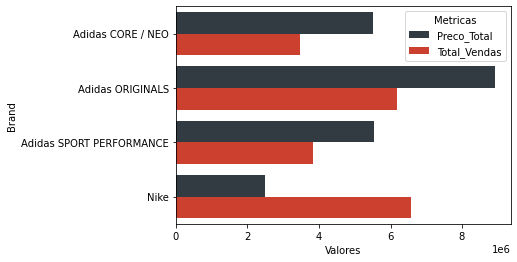

In [59]:
f1 = dados.groupby('Brand').agg(
    Quant_Prod = ('Product ID','count'),
    Preco_Total = ('Listing Price','sum'),
    Total_Vendas = ('Sale Price','sum')
    ).reset_index()

### transformado a base de dados
f1_long = f1.melt(id_vars= 'Brand', var_name='Metricas',value_vars=['Preco_Total','Total_Vendas' ],value_name='Valores')

#### Minha paleta de cores
minha_paleta=['#313B44', '#E62B15', '#8B4944', '#606467', '#AAABAD','#1C1D22']
sns.set_palette(minha_paleta)

### representação gráfica
sns.barplot(
    data=f1_long,
    x= 'Valores',
    y='Brand',
    hue='Metricas',)


In [50]:
dados.groupby('Brand').agg(
    Quant_Prod = ('Product ID','count'),
    Media_descontos = ('Discount','mean'),
    Media_avaliacoes = ('Rating','mean'),
    Quand_visualizacoes = ('Reviews','sum')
)

,Quant_Prod,Media_descontos,Media_avaliacoes,Quand_visualizacoes
Brand,,,,
Adidas CORE / NEO,1111,36.300630,3.412331,53556
Adidas ORIGINALS,908,31.134361,3.323568,44744
Adidas SPORT PERFORMANCE,606,31.732673,3.346205,29605
Nike,643,0.000000,2.734837,4618


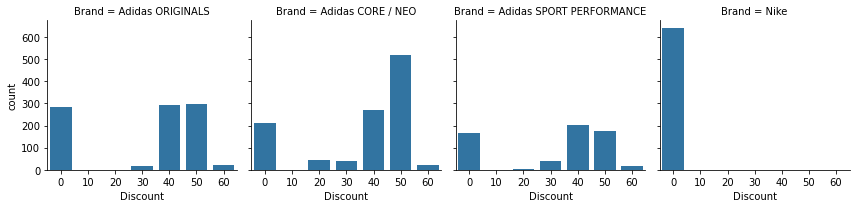

In [71]:
g = sns.FacetGrid(dados, col="Brand")  # Divide os gráficos
g.map(sns.countplot, "Discount",order=[0,10,20,30,40,50,60])

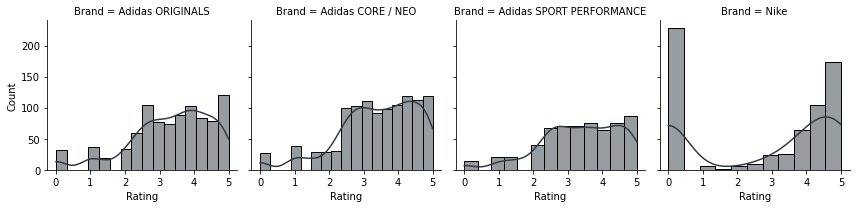

In [61]:
g = sns.FacetGrid(dados, col="Brand")  # Divide os gráficos
g.map(sns.histplot, "Rating", kde=True)  

### Conhecer a distruição do dados

<AxesSubplot:xlabel='Discount', ylabel='Count'>

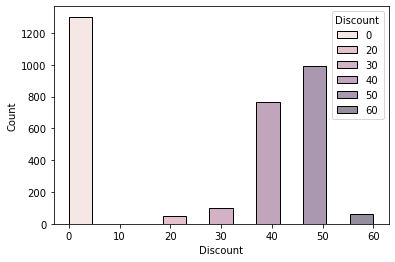

In [60]:
sns.histplot(
    data=dados,
    x='Discount',
    #kind='count'
    hue='Discount',
    kde= True ## função para adicionar a linha do histograma
)
